In [4]:
#import libraries
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


### **Combined Jobs Final dataset**
**DATA UNDERSTANDING**

The Combined  Jobs Final dataset contains 84,090 rows and 23 columns. The columns are: 

***1. Job.ID:*** Unique identifier for each job listing.

***2. Provider:*** Platform or source of the job listing.

***3. Status:*** Current state of the job (e.g., open, closed).

***4. Slug:*** URL-friendly string for the job.

***5. Title:*** Job title or role and the @ refers to the company or location to where the job is at

***6. Position:*** Job position type.

***7. Company:*** Name of the hiring company.

***8. City:*** City where the job is located.

***9. State.Name:*** Name of the state where the job is located.

***10. State.Code:*** Abbreviation or code for the state.

***11. Address:*** Detailed address of the job location.

***12. Latitude:*** Latitude coordinate of the job location.

***13. Longitude:*** Longitude coordinate of the job location.

***14. Industry:*** Industry related to the job.

***15. Job.Description:*** Detailed description of the job role.

***16. Requirements:*** Qualifications and skills required for the job.

***17. Salary:*** Salary offered for the position.

***18. Listing.Start:*** Date the job listing became active.

***19. Listing.End:*** Date the job listing ends or expires.

***20. Employment.Type:*** Type of employment (e.g., full-time, part-time).

***21. Education.Required:*** Educational qualifications required.

***22. Created.At:*** Timestamp when the listing was created.

***23. Updated.At:*** Timestamp of the last update made to the listing.

In [5]:
#loading the data
combined_jobs = pd.read_csv('datasets/Combined_Jobs_Final.csv')
combined_jobs.head()


,Job.ID,Provider,Status,Slug,Title,Position,Company,City,State.Name,State.Code,...,Industry,Job.Description,Requirements,Salary,Listing.Start,Listing.End,Employment.Type,Education.Required,Created.At,Updated.At
0,111,1,open,palo-alto-ca-tacolicious-server,Server @ Tacolicious,Server,Tacolicious,Palo Alto,California,CA,...,Food and Beverages,Tacolicious' first Palo Alto store just opened...,NaN,8.00,NaN,NaN,Part-Time,NaN,2013-03-12 02:08:28 UTC,2014-08-16 15:35:36 UTC
1,113,1,open,san-francisco-ca-claude-lane-kitchen-staff-chef,Kitchen Staff/Chef @ Claude Lane,Kitchen Staff/Chef,Claude Lane,San Francisco,California,CA,...,Food and Beverages,\r\n\r\nNew French Brasserie in S.F. Financia...,NaN,0.00,NaN,NaN,Part-Time,NaN,2013-04-12 08:36:36 UTC,2014-08-16 15:35:36 UTC
2,117,1,open,san-francisco-ca-machka-restaurants-corp-barte...,Bartender @ Machka Restaurants Corp.,Bartender,Machka Restaurants Corp.,San Francisco,California,CA,...,Food and Beverages,We are a popular Mediterranean wine bar and re...,NaN,11.00,NaN,NaN,Part-Time,NaN,2013-07-16 09:34:10 UTC,2014-08-16 15:35:37 UTC
3,121,1,open,brisbane-ca-teriyaki-house-server,Server @ Teriyaki House,Server,Teriyaki House,Brisbane,California,CA,...,Food and Beverages,● Serve food/drinks to customers in a profess...,NaN,10.55,NaN,NaN,Part-Time,NaN,2013-09-04 15:40:30 UTC,2014-08-16 15:35:38 UTC
4,127,1,open,los-angeles-ca-rosa-mexicano-sunset-kitchen-st...,Kitchen Staff/Chef @ Rosa Mexicano - Sunset,Kitchen Staff/Chef,Rosa Mexicano - Sunset,Los Angeles,California,CA,...,Food and Beverages,"Located at the heart of Hollywood, we are one ...",NaN,10.55,NaN,NaN,Part-Time,NaN,2013-07-17 15:26:18 UTC,2014-08-16 15:35:40 UTC


In [6]:
combined_jobs['Slug'].head()

0                      palo-alto-ca-tacolicious-server
1      san-francisco-ca-claude-lane-kitchen-staff-chef
2    san-francisco-ca-machka-restaurants-corp-barte...
3                    brisbane-ca-teriyaki-house-server
4    los-angeles-ca-rosa-mexicano-sunset-kitchen-st...
Name: Slug, dtype: object

Slug is like a link to the job location

In [7]:
combined_jobs['Title'].head()

0                           Server @ Tacolicious
1               Kitchen Staff/Chef @ Claude Lane
2           Bartender @ Machka Restaurants Corp.
3                        Server @ Teriyaki House
4    Kitchen Staff/Chef @ Rosa Mexicano - Sunset
Name: Title, dtype: object

The @ after the title shows the job location

In [8]:
# to view the entire row
#pd.set_option('display.max_colwidth', None)

# Reset to the default column width display
pd.reset_option('display.max_colwidth')

#quick dispaly  to the Job Description columns
combined_jobs['Job.Description'].head(1)



0    Tacolicious' first Palo Alto store just opened...
Name: Job.Description, dtype: object

Job decription is what the recruit will entirely like the first example in our data is:

*Tacolicious' first Palo Alto store just opened recently, and we are hiring! If you love tacos, you will love working at our restaurant!* 

*● Serve food/drinks to customers in a professional manner*

*● Act as a cashier when needed*

*● Clean up the dining space*

*● Train the new staff*

*Name: Job.Description, dtype: object*

In [9]:
combined_jobs.shape

(84090, 23)

In [10]:
combined_jobs.columns

Index(['Job.ID', 'Provider', 'Status', 'Slug', 'Title', 'Position', 'Company',
       'City', 'State.Name', 'State.Code', 'Address', 'Latitude', 'Longitude',
       'Industry', 'Job.Description', 'Requirements', 'Salary',
       'Listing.Start', 'Listing.End', 'Employment.Type', 'Education.Required',
       'Created.At', 'Updated.At'],
      dtype='object')

In [11]:
combined_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84090 entries, 0 to 84089
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Job.ID              84090 non-null  int64  
 1   Provider            84090 non-null  int64  
 2   Status              84090 non-null  object 
 3   Slug                84090 non-null  object 
 4   Title               84090 non-null  object 
 5   Position            84090 non-null  object 
 6   Company             81819 non-null  object 
 7   City                83955 non-null  object 
 8   State.Name          83919 non-null  object 
 9   State.Code          83919 non-null  object 
 10  Address             36 non-null     object 
 11  Latitude            84090 non-null  float64
 12  Longitude           84090 non-null  float64
 13  Industry            267 non-null    object 
 14  Job.Description     84034 non-null  object 
 15  Requirements        0 non-null      float64
 16  Sala

In [12]:
combined_jobs.describe()

,Job.ID,Provider,Latitude,Longitude,Requirements,Salary
count,84090.000000,84090.000000,84090.000000,84090.000000,0.0,229.000000
mean,258490.774979,1.997063,37.967134,-92.151257,NaN,7.832227
std,52653.870401,0.056272,5.458651,17.412900,NaN,7.566016
min,3.000000,1.000000,-34.887672,-166.539760,NaN,0.000000
25%,250415.250000,2.000000,34.072600,-104.249780,NaN,0.000000
50%,271452.500000,2.000000,39.218300,-86.941440,NaN,8.000000
75%,293672.750000,2.000000,41.598965,-79.997460,NaN,10.550000
max,319174.000000,3.000000,71.294700,144.885800,NaN,58.000000


#### ***Data Cleaning***

In [13]:
#checking the percentage of null values in every column
combined_jobs.isnull().sum().sort_values(ascending=False) / len(combined_jobs) * 100

Requirements          100.000000
Address                99.957189
Salary                 99.727673
Industry               99.682483
Company                 2.700678
Listing.Start           0.812225
Education.Required      0.317517
State.Code              0.203354
State.Name              0.203354
Listing.End             0.198597
City                    0.160542
Job.Description         0.066595
Employment.Type         0.011892
Job.ID                  0.000000
Provider                0.000000
Position                0.000000
Title                   0.000000
Slug                    0.000000
Status                  0.000000
Latitude                0.000000
Longitude               0.000000
Created.At              0.000000
Updated.At              0.000000
dtype: float64

In [14]:
#columns to drop
columns_to_drop = ['Requirements', 'Address', 'Salary', 'Industry', 'Created.At', 'Updated.At']
#dropping columns
combined_jobs = combined_jobs.drop(columns=columns_to_drop)


#replacing missing values with the mode for specific columns
for column in ['Listing.Start', 'Education.Required', 'State.Code', 'State.Name', 
               'Listing.End', 'City', 'Employment.Type']:
    combined_jobs[column].fillna(combined_jobs[column].mode()[0], inplace=True)


#dropping rows of the company, job description that have missing values
combined_jobs = combined_jobs.dropna(subset=['Company', 'Job.Description'])

C:\Users\PHIL CONRAD\AppData\Local\Temp\ipykernel_23108\2473218848.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_jobs[column].fillna(combined_jobs[column].mode()[0], inplace=True)


In [15]:
combined_jobs.isnull().sum()

Job.ID                0
Provider              0
Status                0
Slug                  0
Title                 0
Position              0
Company               0
City                  0
State.Name            0
State.Code            0
Latitude              0
Longitude             0
Job.Description       0
Listing.Start         0
Listing.End           0
Employment.Type       0
Education.Required    0
dtype: int64

In [16]:
#checking duplicated values esp for JobID
combined_jobs.duplicated().sum()

np.int64(0)

In [17]:
combined_jobs.head()

,Job.ID,Provider,Status,Slug,Title,Position,Company,City,State.Name,State.Code,Latitude,Longitude,Job.Description,Listing.Start,Listing.End,Employment.Type,Education.Required
0,111,1,open,palo-alto-ca-tacolicious-server,Server @ Tacolicious,Server,Tacolicious,Palo Alto,California,CA,37.443346,-122.161170,Tacolicious' first Palo Alto store just opened...,03-03-2015,01-04-2015,Part-Time,Not Specified
1,113,1,open,san-francisco-ca-claude-lane-kitchen-staff-chef,Kitchen Staff/Chef @ Claude Lane,Kitchen Staff/Chef,Claude Lane,San Francisco,California,CA,37.789830,-122.404268,\r\n\r\nNew French Brasserie in S.F. Financia...,03-03-2015,01-04-2015,Part-Time,Not Specified
2,117,1,open,san-francisco-ca-machka-restaurants-corp-barte...,Bartender @ Machka Restaurants Corp.,Bartender,Machka Restaurants Corp.,San Francisco,California,CA,37.795597,-122.402963,We are a popular Mediterranean wine bar and re...,03-03-2015,01-04-2015,Part-Time,Not Specified
3,121,1,open,brisbane-ca-teriyaki-house-server,Server @ Teriyaki House,Server,Teriyaki House,Brisbane,California,CA,37.685073,-122.400275,● Serve food/drinks to customers in a profess...,03-03-2015,01-04-2015,Part-Time,Not Specified
4,127,1,open,los-angeles-ca-rosa-mexicano-sunset-kitchen-st...,Kitchen Staff/Chef @ Rosa Mexicano - Sunset,Kitchen Staff/Chef,Rosa Mexicano - Sunset,Los Angeles,California,CA,34.073384,-118.460439,"Located at the heart of Hollywood, we are one ...",03-03-2015,01-04-2015,Part-Time,Not Specified


In [18]:
#add to removals 
combined_jobs = combined_jobs.drop(columns=['Listing.End', 'Listing.Start', 'Latitude', 'Longitude', 
                                            'State.Code', 'Status', 'Title', 'Slug'])

In [19]:
combined_jobs.shape

(81766, 9)

In [20]:
combined_jobs.head()

,Job.ID,Provider,Position,Company,City,State.Name,Job.Description,Employment.Type,Education.Required
0,111,1,Server,Tacolicious,Palo Alto,California,Tacolicious' first Palo Alto store just opened...,Part-Time,Not Specified
1,113,1,Kitchen Staff/Chef,Claude Lane,San Francisco,California,\r\n\r\nNew French Brasserie in S.F. Financia...,Part-Time,Not Specified
2,117,1,Bartender,Machka Restaurants Corp.,San Francisco,California,We are a popular Mediterranean wine bar and re...,Part-Time,Not Specified
3,121,1,Server,Teriyaki House,Brisbane,California,● Serve food/drinks to customers in a profess...,Part-Time,Not Specified
4,127,1,Kitchen Staff/Chef,Rosa Mexicano - Sunset,Los Angeles,California,"Located at the heart of Hollywood, we are one ...",Part-Time,Not Specified


In [21]:
combined_jobs['Employment.Type'].value_counts()

Employment.Type
Part-Time              32160
Seasonal/Temp          27389
Full-Time/Part-Time    16759
Per Diem                4502
Intern                   904
Full-Time                 37
Contract                  14
Temporary/seasonal         1
Name: count, dtype: int64

In [22]:
combined_jobs.loc[:, "Employment.Type"] = combined_jobs["Employment.Type"].replace(["Temporary/seasonal"], "Seasonal/Temp")

In [23]:
combined_jobs['Employment.Type'].value_counts()

Employment.Type
Part-Time              32160
Seasonal/Temp          27390
Full-Time/Part-Time    16759
Per Diem                4502
Intern                   904
Full-Time                 37
Contract                  14
Name: count, dtype: int64

In [24]:
combined_jobs['Education.Required'].value_counts()

Education.Required
Not Specified          60919
High School Diploma    13704
Associate Degree        3381
Bachelor's Degree       2753
Master's Degree         1009
Name: count, dtype: int64

In [25]:
combined_jobs['Provider'].value_counts()

Provider
2    81499
1      257
3       10
Name: count, dtype: int64

In [26]:
combined_jobs['Company'].value_counts()

Company
Accountemps                                     12471
OfficeTeam                                      11423
BAYADA HOME HEALTH CARE                          2194
Vector Marketing                                 1681
Macy's                                           1625
                                                ...  
Fior d'Italia                                       1
Luques Restaurant inside of Chancellor Hotel        1
JoLe                                                1
Ajisen Ramen                                        1
Susumu Japanese Steak House                         1
Name: count, Length: 8334, dtype: int64

In [27]:
combined_jobs['Position'].value_counts()

Position
Administrative Assistant                                                                            1392
Customer Service Representative                                                                     1270
Accounts Payable Clerk                                                                               968
Accounting Clerk                                                                                     950
Sales Representative / Sales Associate ( Entry Level )                                               917
                                                                                                    ... 
Prime Time Universal Service Representative                                                            1
Entry Level Security Officer                                                                           1
Experienced Security Officer                                                                           1
Receptionist Security Officer/Concierge       

In [28]:
combined_jobs['State.Name'].value_counts()

State.Name
California              10761
Florida                  5465
Texas                    5313
Pennsylvania             4857
Illinois                 3960
Ohio                     3938
New York                 3122
New Jersey               2757
Minnesota                2414
Washington               2389
Indiana                  2351
Massachusetts            2195
Michigan                 2144
North Carolina           1937
Wisconsin                1859
Virginia                 1760
Arizona                  1700
Tennessee                1672
Maryland                 1651
Georgia                  1641
Colorado                 1633
Connecticut              1365
Missouri                 1344
Iowa                     1146
Oregon                   1088
Kentucky                 1081
Nevada                    987
South Carolina            893
Kansas                    798
Louisiana                 746
Utah                      674
Alabama                   583
New Hampshire             570

#### ***Exploratory Data Analysis(Combined Data)***

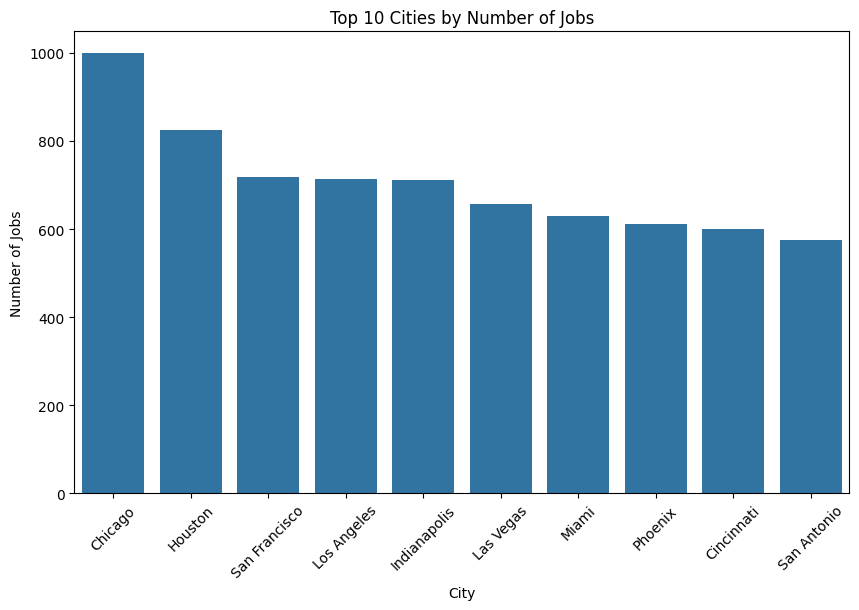

In [29]:
# Plot top 10 cities with the highest number of job listings
plt.figure(figsize=(10, 6))

# Get the top 10 cities
top_10_cities = combined_jobs['City'].value_counts().nlargest(10).index

# Filter the dataset for top 10 cities
sns.countplot(data=combined_jobs[combined_jobs['City'].isin(top_10_cities)], 
              x='City', 
              order=top_10_cities)

plt.title('Top 10 Cities by Number of Jobs')
plt.xlabel('City')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45)
plt.show()


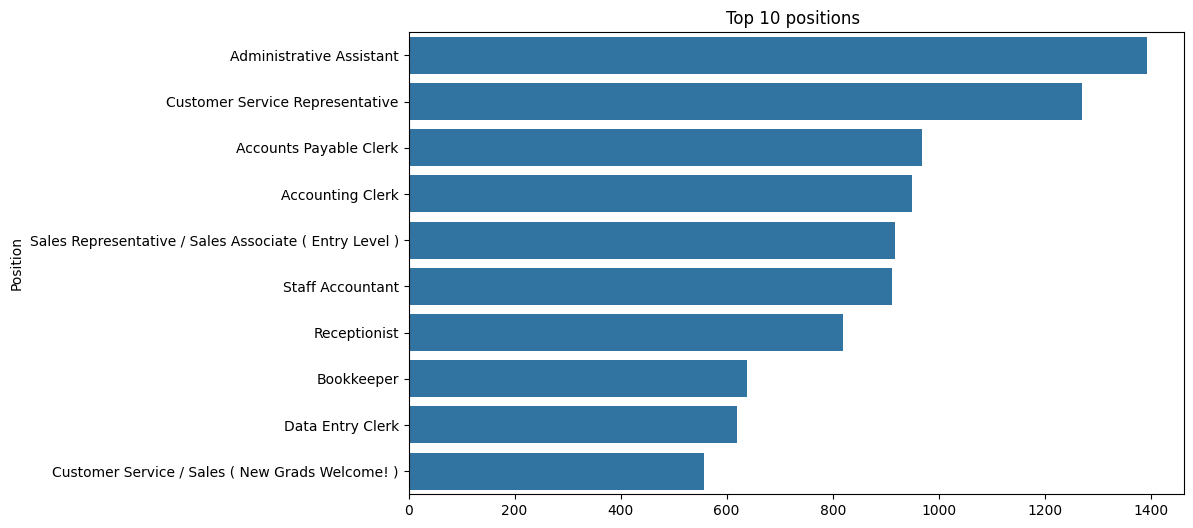

In [30]:
#top 10 positions 
top_positions = combined_jobs['Position'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_positions.index, x=top_positions.values)
plt.title('Top 10 positions ')
plt.show()

In [31]:
def plot_categorical_distribution(df, column_name, top_n=10, show_counts=True, show_percentages=True):
    """
    Plots the distribution of a categorical feature with counts and/or percentages.
    
    """	
    # Check if the column exists in the DataFrame
    if column_name not in df.columns:
        print(f"Column '{column_name}' does not exist in the DataFrame.")
        return
    
    # Check if the column is categorical
    if not pd.api.types.is_object_dtype(df[column_name]) and not pd.api.types.is_categorical_dtype(df[column_name]):
        print(f"Column '{column_name}' is not a categorical data type.")
        return
    
    # Drop missing values
    data = df[column_name].dropna()
    
    # Calculate value counts
    counts = data.value_counts()
    
    # Handle high-cardinality by selecting top_n categories
    if len(counts) > top_n:
        top_categories = counts.nlargest(top_n)
        other_count = counts.sum() - top_categories.sum()
        counts = pd.concat([top_categories, pd.Series({'Other': other_count})])
    
    # Calculate percentages
    percentages = (counts / counts.sum()) * 100
    
    # Create a DataFrame for plotting
    plot_df = pd.DataFrame({
        'Category': counts.index,
        'Count': counts.values,
        'Percentage': percentages.values
    })
    
    # Set the plot style
    sns.set(style="whitegrid")
    
    # Initialize the matplotlib figure
    plt.figure(figsize=(10, 6))
    
    # Create a bar plot
    barplot = sns.barplot(x='Count', y='Category', data=plot_df, palette='viridis')
    
    # Add count labels
    if show_counts:
        for index, row in plot_df.iterrows():
            barplot.text(row['Count'] + plot_df['Count'].max()*0.01, index, 
                        f"{row['Count']}", color='black', va="center")
    
    # Add percentage labels
    if show_percentages:
        for index, row in plot_df.iterrows():
            barplot.text(row['Count'] + plot_df['Count'].max()*0.15, index, 
                        f"{row['Percentage']:.2f}%", color='black', va="center")
    
    # Set titles and labels
    plt.title(f'Distribution of {column_name}', fontsize=16)
    plt.xlabel('Count', fontsize=14)
    plt.ylabel(column_name, fontsize=14)
    
    plt.tight_layout()
    plt.show();

C:\Users\PHIL CONRAD\AppData\Local\Temp\ipykernel_23108\45243248.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Count', y='Category', data=plot_df, palette='viridis')


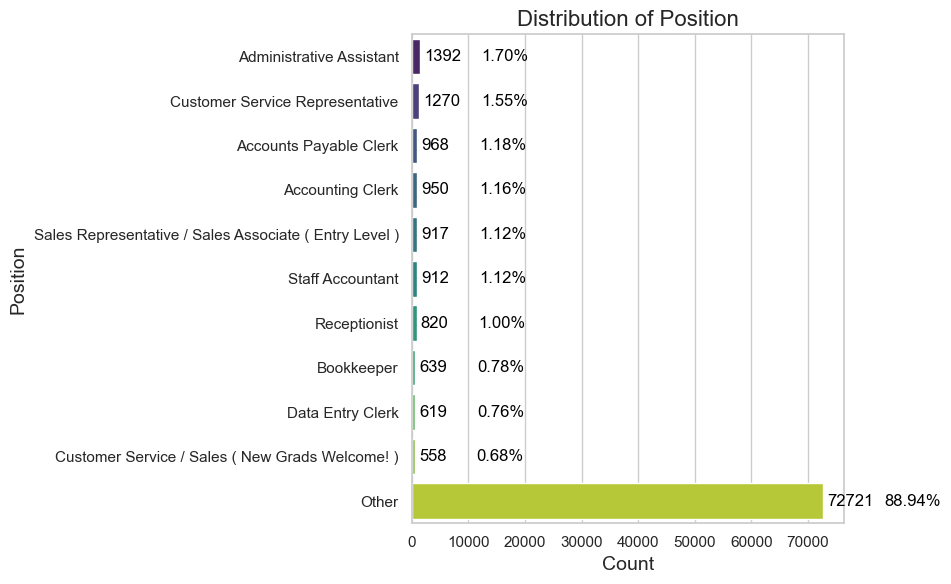

In [32]:
plot_categorical_distribution(combined_jobs, 'Position', top_n=10)

C:\Users\PHIL CONRAD\AppData\Local\Temp\ipykernel_23108\45243248.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Count', y='Category', data=plot_df, palette='viridis')


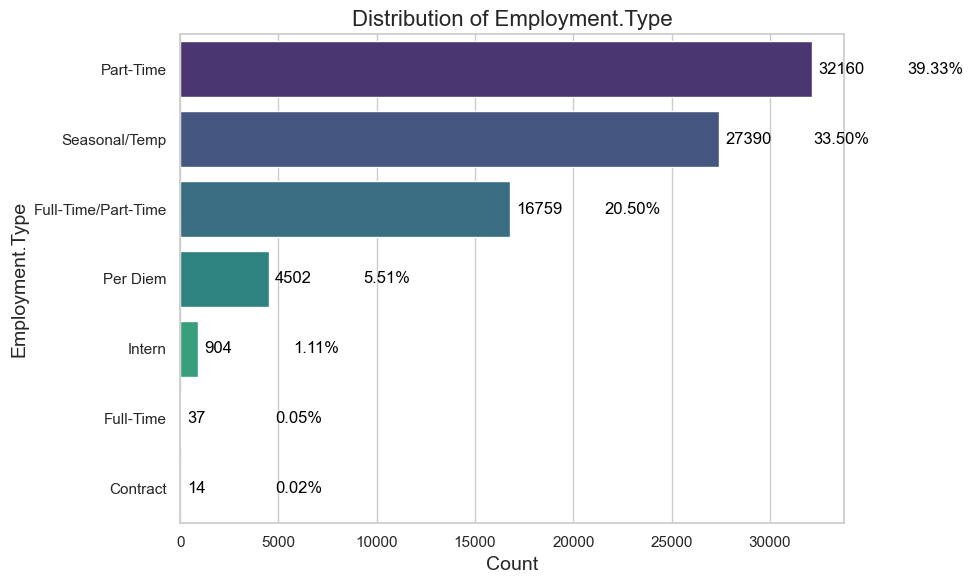

In [33]:
plot_categorical_distribution(combined_jobs, 'Employment.Type', top_n=10)

In [34]:
combined_jobs.head()

,Job.ID,Provider,Position,Company,City,State.Name,Job.Description,Employment.Type,Education.Required
0,111,1,Server,Tacolicious,Palo Alto,California,Tacolicious' first Palo Alto store just opened...,Part-Time,Not Specified
1,113,1,Kitchen Staff/Chef,Claude Lane,San Francisco,California,\r\n\r\nNew French Brasserie in S.F. Financia...,Part-Time,Not Specified
2,117,1,Bartender,Machka Restaurants Corp.,San Francisco,California,We are a popular Mediterranean wine bar and re...,Part-Time,Not Specified
3,121,1,Server,Teriyaki House,Brisbane,California,● Serve food/drinks to customers in a profess...,Part-Time,Not Specified
4,127,1,Kitchen Staff/Chef,Rosa Mexicano - Sunset,Los Angeles,California,"Located at the heart of Hollywood, we are one ...",Part-Time,Not Specified


In [35]:
cols = ["Job.ID", "Position", "Company", "City", "State.Name", 
         "Education.Required", "Employment.Type", "Job.Description"]

# Select and rename columns in one step
combined_jobs = combined_jobs[cols].rename(columns={
    "Job.ID": "Job_ID",
    "State.Name": "State_Name",
    "Employment.Type": "Employment_Type",
    "Job.Description": "Job_Description",
    "Education.Required": "Education_Required"
})

# Display the first few rows
combined_jobs.head()


,Job_ID,Position,Company,City,State_Name,Education_Required,Employment_Type,Job_Description
0,111,Server,Tacolicious,Palo Alto,California,Not Specified,Part-Time,Tacolicious' first Palo Alto store just opened...
1,113,Kitchen Staff/Chef,Claude Lane,San Francisco,California,Not Specified,Part-Time,\r\n\r\nNew French Brasserie in S.F. Financia...
2,117,Bartender,Machka Restaurants Corp.,San Francisco,California,Not Specified,Part-Time,We are a popular Mediterranean wine bar and re...
3,121,Server,Teriyaki House,Brisbane,California,Not Specified,Part-Time,● Serve food/drinks to customers in a profess...
4,127,Kitchen Staff/Chef,Rosa Mexicano - Sunset,Los Angeles,California,Not Specified,Part-Time,"Located at the heart of Hollywood, we are one ..."


In [36]:
#Text Preprocessing
def preprocess_text(text):
    """
    Preprocesses the text data by removing punctuation, digits, and special characters and extra spaces.
    
    """
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove digits
    text = text.translate(str.maketrans('', '', string.digits))
    
    # Remove special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    text = re.sub(r'\s+', ' ', text).strip()
    text = text.lower()
    
    return text

In [37]:
combined_jobs['Job_Description'] = combined_jobs['Job_Description'].apply(preprocess_text)

In [38]:
combined_jobs['Job_Description'].head()

0    tacolicious first palo alto store just opened ...
1    new french brasserie in sf financial district ...
2    we are a popular mediterranean wine bar and re...
3    serve fooddrinks to customers in a professiona...
4    located at the heart of hollywood we are one o...
Name: Job_Description, dtype: object

In [39]:
combined_jobs['Position'] = combined_jobs['Position'].apply(preprocess_text)

In [40]:
combined_jobs['Position'].head()

0               server
1    kitchen staffchef
2            bartender
3               server
4    kitchen staffchef
Name: Position, dtype: object

In [41]:
combined_jobs.columns

Index(['Job_ID', 'Position', 'Company', 'City', 'State_Name',
       'Education_Required', 'Employment_Type', 'Job_Description'],
      dtype='object')

In [42]:
#tfidf_vect = TfidfVectorizer(stop_words='english', max_features= 5000)

#tfidf_matrix = tfidf_vect.fit_transform(combined_jobs['Job_Description'])

In [43]:
#tfidf_vect = TfidfVectorizer(stop_words='english', max_features= 5000)

#tfidf_matrix = tfidf_vect.fit_transform(combined_jobs['Position'])

In [44]:
# Step 1: Combine textual columns for TF-IDF
combined_jobs['combined_text'] = combined_jobs[['Position', 'Company', 'City', 'State_Name', 'Job_Description', 'Education_Required']].apply(lambda x: ' '.join(x.astype(str)), axis=1)

# Step 2: Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=100)  # Adjust max_features as needed

# Step 3: Fit and transform the 'combined_text' column
tfidf_matrix = tfidf.fit_transform(combined_jobs['combined_text'])

# Step 4: Convert to DataFrame for better viewing
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# View the TF-IDF matrix
print(tfidf_df)

       ability  accounts       all        an       and       are        as  \
0          0.0  0.000000  0.000000  0.000000  0.102198  0.151824  0.146168   
1          0.0  0.000000  0.000000  0.263989  0.378154  0.374518  0.120189   
2          0.0  0.000000  0.000000  0.164878  0.314909  0.311881  0.150132   
3          0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.184539   
4          0.0  0.000000  0.000000  0.000000  0.000000  0.424470  0.000000   
...        ...       ...       ...       ...       ...       ...       ...   
81761      0.0  0.555725  0.169615  0.000000  0.000000  0.271330  0.130612   
81762      0.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
81763      0.0  0.000000  0.000000  0.000000  0.581643  0.078552  0.075626   
81764      0.0  0.000000  0.211415  0.178790  0.113827  0.338197  0.162800   
81765      0.0  0.000000  0.000000  0.000000  0.253469  0.376548  0.000000   

       assigned  assistant        at  ...        up        we  

In [45]:
from sklearn.decomposition import TruncatedSVD
# Step 1: Apply Dimensionality Reduction using Truncated SVD
# We reduce the dimensions of the TF-IDF matrix to avoid memory issues and to speed up computations.
n_components = 100  # Number of dimensions to reduce to (adjust based on performance and data size)
svd = TruncatedSVD(n_components=n_components, random_state=42)
tfidf_reduced = svd.fit_transform(tfidf_matrix)

# Step 2: Calculate the Cosine Similarity Matrix
# Cosine similarity measures the similarity between two vectors, regardless of their magnitude.
cosine_sim = cosine_similarity(tfidf_reduced, tfidf_reduced)

# Step 3: Build a function to get job recommendations
def get_recommendations(job_index, cosine_sim_matrix, df, top_n=10):
    """
    Given a job_index, returns the top_n most similar jobs using cosine similarity.
    
    Parameters:
    - job_index: Index of the job in the DataFrame to base recommendations on
    - cosine_sim_matrix: Cosine similarity matrix for the jobs
    - df: Original DataFrame with job details
    - top_n: Number of recommendations to return (default is 10)
    
    Returns:
    - top_n similar job listings
    """
    # Get similarity scores for the given job
    sim_scores = list(enumerate(cosine_sim_matrix[job_index]))
    
    # Sort jobs by similarity score (highest to lowest) and ignore the job itself
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the top_n most similar jobs (ignoring the first one, which is the job itself)
    sim_scores = sim_scores[1:top_n + 1]
    
    # Get the job indices for the top_n most similar jobs
    job_indices = [i[0] for i in sim_scores]
    
    # Return the top_n similar job listings
    return df.iloc[job_indices][['Position', 'Company', 'City', 'Employment_Type', 'Job_Description']]

# Step 4: Example of getting recommendations for a specific job
# Let's say we want to get recommendations for the job at index 0
job_index = 0  # Change this index to test for other jobs
recommended_jobs = get_recommendations(job_index, cosine_sim, combined_jobs)


print("Top recommended jobs:")
print(recommended_jobs)

MemoryError: Unable to allocate 49.8 GiB for an array with shape (81766, 81766) and data type float64